---
title: "EDA"
---

In [52]:
import pandas as pd
import ast
import networkx as nx
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [53]:
df = pd.read_csv("../data/processed/cleaned_movies.csv")

In [54]:
list_columns = ["Genre", "Actors", "Directors"]

for col in list_columns:
    df[col] = df[col].apply(lambda x: literal_eval(x) if isinstance(x, str) else [])

## Ratings Distributions

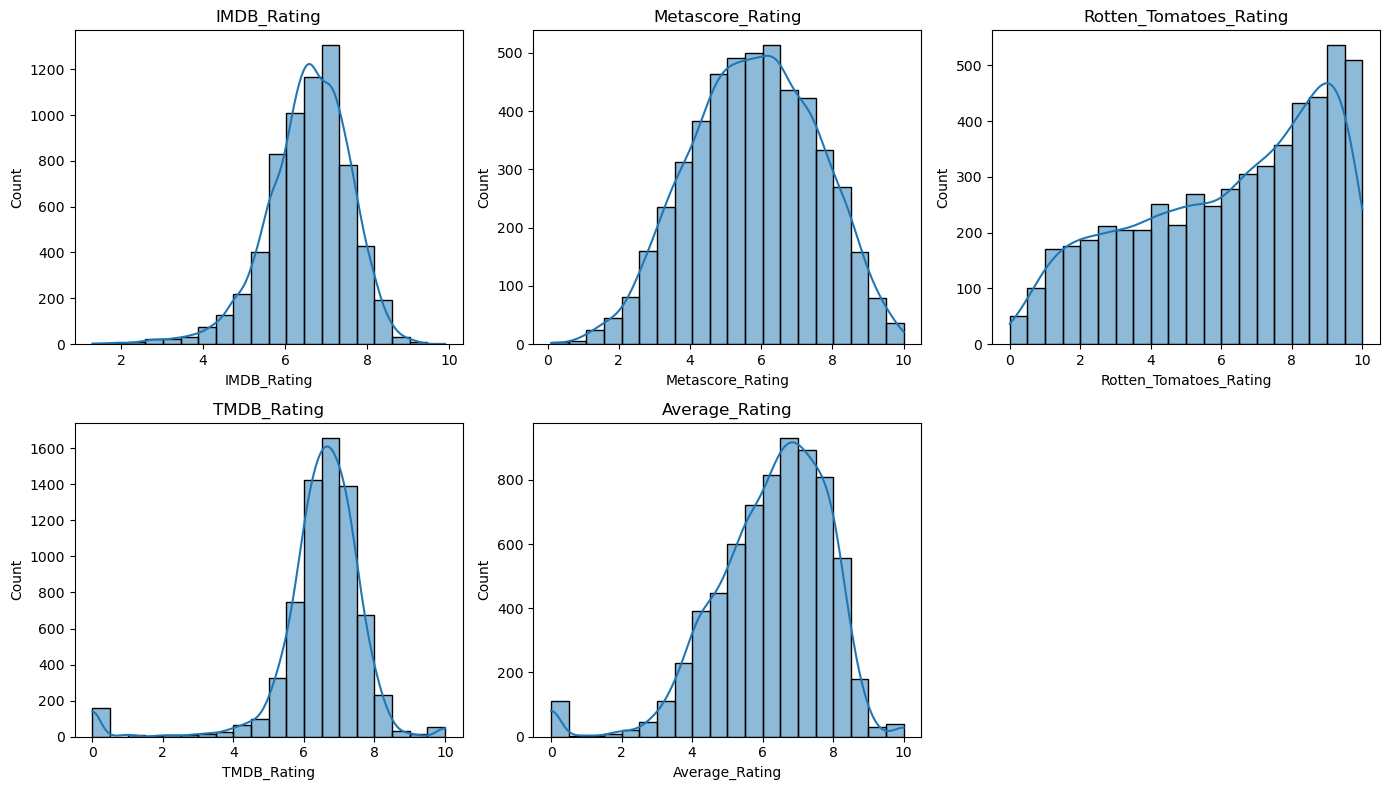

In [55]:
ratings = ["IMDB_Rating", "Metascore_Rating", "Rotten_Tomatoes_Rating", "TMDB_Rating", "Average_Rating"]

plt.figure(figsize = (14, 8))


for i, rating in enumerate(ratings, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[rating].dropna(), kde = True, bins = 20)
    plt.title(rating)

plt.tight_layout()
plt.show()

## Genre Count Plots

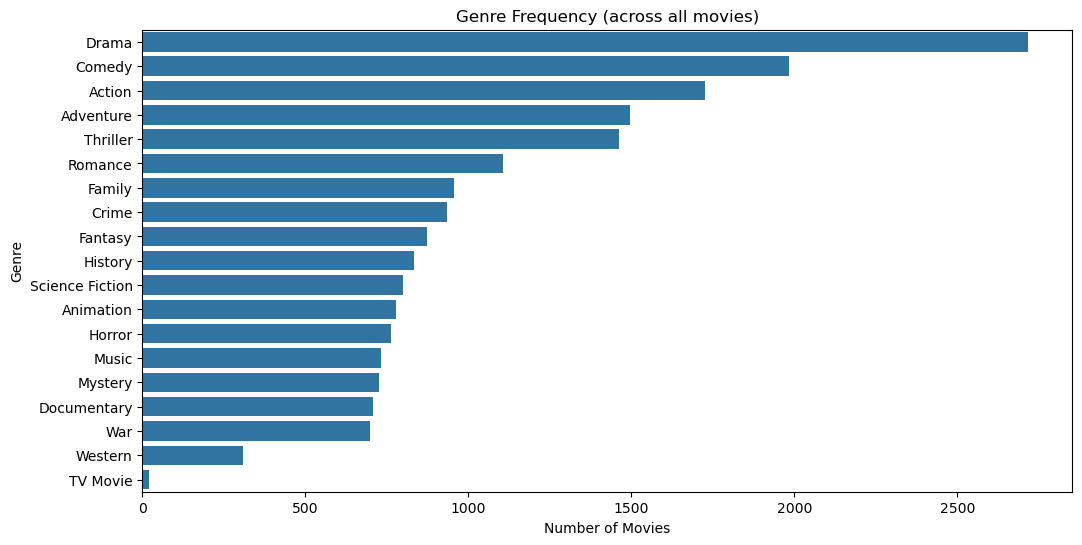

In [56]:
from collections import Counter
all_genres = df["Genre"].explode()
genre_counts = Counter([genre for genres in df["Genre"] for genre in genres])

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns = ["Genre", "Count"]).sort_values("Count", ascending = False)

# Plot
plt.figure(figsize = (12, 6))
sns.barplot(x = "Count", y = "Genre", data = genre_df)
plt.title("Genre Frequency (across all movies)")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

## Number of Distinct Actors and Directors

In [57]:
# Flatten and deduplicate
all_actors = set(actor.strip() for sublist in df["Actors"] for actor in sublist)
all_directors = set(director.strip() for sublist in df["Directors"] for director in sublist)

print(f"Total distinct actors: {len(all_actors)}")
print(f"Total distinct directors: {len(all_directors)}")

Total distinct actors: 31291
Total distinct directors: 3860


## Budget vs Revenue Scatterplot

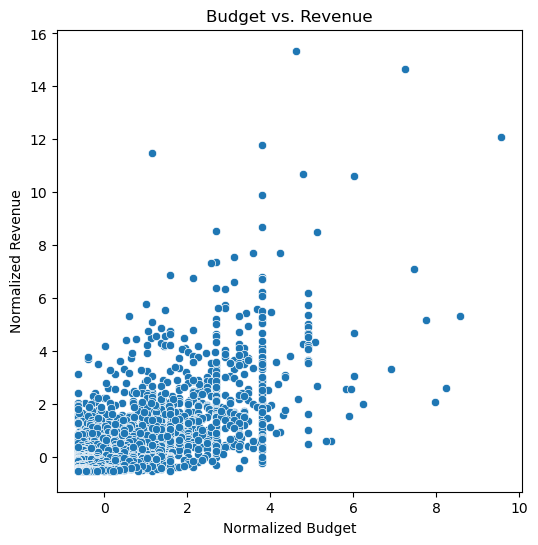

In [60]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = "Budget_Normalized", y = "Revenue_Normalized", data = df)
plt.title("Budget vs. Revenue")
plt.xlabel("Normalized Budget")
plt.ylabel("Normalized Revenue")
plt.show()